# **Restaurant Recommendation**

In this task, you will work on mining this data set to discover knowledge about cuisines. In the Yelp data set, businesses are tagged with categories. For example, the category "restaurant" identifies all the restaurants. Specific restaurants are also tagged with cuisines (e.g., "Indian" or "Italian"). This provides an opportunity to aggregate all the information about a particular cuisine and obtain an enriched representation of a cuisine using, for example, review text for all the restaurants of a particular cuisine. Such a representation can then be exploited to assess the similarity between two cuisines, which further enables clustering of cuisines.
<br>

The goal of this task is to mine the data set to construct a cuisine map to visually understand the landscape of different types of cuisines and their similarities. The cuisine map can help users understand what cuisines are available and their relations, which allows for the discovery of new cuisines, thus facilitating exploration of unfamiliar cuisines.
<br>

**Step 1: Visualization of the Cuisine Map**

Use all the reviews of restaurants of each cuisine to represent that cuisine, and compute the similarity of cuisines based on the similarity of their corresponding text representations. Visualize the similarities of the cuisines and describe your visualization.  

**Step 2: Extract Topic for Similar Cuisines to Uncover the Pattern**  

In [ ]:
!pip install wordcloud matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud matplotlib pillow

In [ ]:
# Import libraries

import os
import json
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create Folder
business_file_path = '/content/drive/MyDrive/Data Mining Project UIUC/dataset/yelp_academic_dataset_business.json'
review_file_path = '/content/drive/MyDrive/Data Mining Project UIUC/dataset/yelp_academic_dataset_review.json'
reviews_directory = '/content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category'

# Ensure the reviews directory exists
if not os.path.exists(reviews_directory):
    os.makedirs(reviews_directory)
    print(f"Created directory: {reviews_directory}")
else:
    print(f"Directory already exists: {reviews_directory}")


Directory already exists: /content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category


**Extract Each Categories**

In [ ]:
# File path to the Yelp business data
output_file_path = '/content/drive/MyDrive/Data Mining Project UIUC/task2/unique_categories.txt'

# Set to store all unique categories
unique_categories = set()

In [ ]:
# Load business data and extract categories
with open(business_file_path, 'r') as business_file:
    for line in business_file:
        business = json.loads(line.strip())
        # Check if 'categories' key exists in the business data
        if 'categories' in business:
            categories = business['categories']
            # If categories are stored as a list of strings
            if isinstance(categories, list):
                unique_categories.update(categories)  # Add all categories to the set
            # If categories are stored as a comma-separated string
            elif isinstance(categories, str):
                category_list = [category.strip() for category in categories.split(",")]
                unique_categories.update(category_list)  # Add all categories to the set

# Save unique categories to a text file
with open(output_file_path, 'w') as file:
    for category in sorted(unique_categories):
        file.write(f"{category}\n")

print(f"Total Unique Categories: {len(unique_categories)}")
print(f"Unique categories have been saved to {output_file_path}")

Total Unique Categories: 715
Unique categories have been saved to /content/drive/MyDrive/Data Mining Project UIUC/task2/unique_categories.txt


**Processing the Selected Categories**

In [ ]:
# Define the selected categories (cuisines)
selected_categories = ["American (New)", "Australian", "Beer, Wine & Spirits", "Breakfast & Brunch",
                       "Chicken Wings", "Chinese", "Cupcakes", "Desserts", "Ice Cream & Frozen Yogurt",
                       "Indonesian", "Italian", "Japanese", "Juice Bars & Smoothies", "Korean",
                       "Mexican", "Patisserie/Cake Shop", "Pizza", "Ramen", "Salad",
                       "Sandwiches", "Seafood", "Soup", "Sushi Bars", "Vegetarian"]

In [ ]:
# Step 1: Load business data and map business_id to their categories
def load_business_categories(business_file_path):
    business_categories = defaultdict(list)  # Map business_id to list of categories
    with open(business_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            business = json.loads(line.strip())
            if 'categories' in business:
                business_id = business['business_id']
                # Check if the business belongs to any of the selected categories
                categories = [cat for cat in business['categories'] if cat in selected_categories]
                if categories:
                    business_categories[business_id] = categories
    return business_categories

# Step 2: Collect reviews and store them in separate files for each category
def collect_reviews_by_category(business_categories, review_file_path, reviews_directory):
    category_reviews = defaultdict(str)  # To accumulate reviews for each category
    review_count = 0

    with open(review_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            review = json.loads(line.strip())
            business_id = review['business_id']
            if business_id in business_categories:
                # Append the review text to the corresponding categories
                review_text = review['text']
                for category in business_categories[business_id]:
                    category_reviews[category] += ' ' + review_text
                review_count += 1

                # Print progress for every 50,000 reviews processed
                if review_count % 50000 == 0:
                    print(f"Processed {review_count} reviews so far.")

    # Save reviews to files by category
    for category, reviews in category_reviews.items():
        file_path = os.path.join(reviews_directory, f"{category.replace('/', '_')}.txt")  # Handle path issues
        with open(file_path, 'w', encoding='utf-8') as writer:
            writer.write(reviews)
        print(f"Saved reviews for {category} to {file_path}")

    print(f"Total reviews processed and saved: {review_count}")

# Step 3: Main function to coordinate the process
def main():
    # Load business data and filter for selected categories
    business_categories = load_business_categories(business_file_path)
    print(f"Found {len(business_categories)} businesses in the selected categories.")

    # Collect and save reviews by category
    collect_reviews_by_category(business_categories, review_file_path, reviews_directory)
    print("Review collection and saving completed.")

if __name__ == '__main__':
    main()

Found 9907 businesses in the selected categories.
Processed 50000 reviews so far.
Processed 100000 reviews so far.
Processed 150000 reviews so far.
Processed 200000 reviews so far.
Processed 250000 reviews so far.
Processed 300000 reviews so far.
Processed 350000 reviews so far.
Processed 400000 reviews so far.
Processed 450000 reviews so far.
Saved reviews for Ice Cream & Frozen Yogurt to /content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category/Ice Cream & Frozen Yogurt.txt
Saved reviews for Chinese to /content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category/Chinese.txt
Saved reviews for Pizza to /content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category/Pizza.txt
Saved reviews for Mexican to /content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category/Mexican.txt
Saved reviews for Sandwiches to /content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category/Sandwiches.txt
Saved reviews for Chicken Wings to /content/drive/MyDrive/Data Mining P

###**Next Steps:**  

1. Preprocess the Collected Reviews:  
  Before calculating similarities, we need to clean and preprocess the text in the review files. This typically involves:
  - Lowercasing the text.  
  - Removing stop words (e.g., "and", "the").  
  - Removing punctuation and special characters.  
  - Stemming or lemmatizing the words to reduce them to their root form (e.g., "running" becomes "run").

2. Vectorize the Text for Each Category:  
  After preprocessing the reviews, we will convert them into a numerical format (vectorization) using techniques such as:  
  - TF-IDF (Term Frequency-Inverse Document Frequency): This gives more weight to words that are frequent in one category but not frequent across all categories.
  - Bag-of-Words (BOW): A simpler method that counts word occurrences.
  - Word Embeddings (optional): Advanced methods like Word2Vec or GloVe could be used to capture more semantic relationships between words.  

3. Calculate Similarities Between Categories:

  Use Cosine Similarity to compute the similarity between the review vectors for each category. Cosine similarity is a measure that calculates the cosine of the angle between two vectors, indicating how similar the two vectors are.

4. Visualize the Similarities:

  Once the similarities are calculated, create a visualization (e.g., a heatmap) to show how closely related the cuisines are based on their reviews.

In [ ]:
nltk.download('stopwords')

# File paths
reviews_directory = '/content/drive/MyDrive/Data Mining Project UIUC/reviews_by_category'
preprocessed_directory = '/content/drive/MyDrive/Data Mining Project UIUC/preprocessed_reviews'

# Ensure the preprocessed reviews directory exists
if not os.path.exists(preprocessed_directory):
    os.makedirs(preprocessed_directory)

# Preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

# Preprocess all reviews in the reviews directory
def preprocess_reviews(reviews_directory, preprocessed_directory):
    for filename in os.listdir(reviews_directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(reviews_directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                reviews = file.read()
                preprocessed_reviews = preprocess_text(reviews)

            # Save the preprocessed reviews
            preprocessed_file_path = os.path.join(preprocessed_directory, filename)
            with open(preprocessed_file_path, 'w', encoding='utf-8') as preprocessed_file:
                preprocessed_file.write(preprocessed_reviews)
            print(f"Preprocessed and saved: {filename}")

# Main function to preprocess reviews
preprocess_reviews(reviews_directory, preprocessed_directory)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preprocessed and saved: Ice Cream & Frozen Yogurt.txt
Preprocessed and saved: Chinese.txt
Preprocessed and saved: Pizza.txt
Preprocessed and saved: Mexican.txt
Preprocessed and saved: Sandwiches.txt
Preprocessed and saved: Chicken Wings.txt
Preprocessed and saved: Beer, Wine & Spirits.txt
Preprocessed and saved: Breakfast & Brunch.txt
Preprocessed and saved: American (New).txt
Preprocessed and saved: Italian.txt
Preprocessed and saved: Seafood.txt
Preprocessed and saved: Japanese.txt
Preprocessed and saved: Soup.txt
Preprocessed and saved: Salad.txt
Preprocessed and saved: Sushi Bars.txt
Preprocessed and saved: Juice Bars & Smoothies.txt
Preprocessed and saved: Vegetarian.txt
Preprocessed and saved: Desserts.txt
Preprocessed and saved: Korean.txt
Preprocessed and saved: Indonesian.txt
Preprocessed and saved: Patisserie_Cake Shop.txt
Preprocessed and saved: Cupcakes.txt
Preprocessed and saved: Ramen.txt
Preprocessed and saved: Australian.txt


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed reviews
def vectorize_reviews(preprocessed_directory):
    reviews_data = []
    category_names = []

    # Load the preprocessed reviews for each category
    for filename in os.listdir(preprocessed_directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(preprocessed_directory, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                reviews = file.read()
                reviews_data.append(reviews)
                category_names.append(filename.replace(".txt", ""))

    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to top 1000 words for simplicity
    vectors = vectorizer.fit_transform(reviews_data)

    return vectors, category_names

# Execute vectorization
vectors, category_names = vectorize_reviews(preprocessed_directory)
print("Vectorization complete!")

Vectorization complete!


In [ ]:
# Calculate cosine similarity between categories
def calculate_similarity(vectors, category_names):
    similarity_matrix = cosine_similarity(vectors)

    # Print similarity matrix
    print("Cosine Similarity Matrix:")
    print(similarity_matrix)

    return similarity_matrix

# Execute similarity calculation
similarity_matrix = calculate_similarity(vectors, category_names)

Cosine Similarity Matrix:
[[1.         0.68225139 0.611002   0.69197557 0.75421685 0.68333106
  0.75593438 0.74765231 0.75565746 0.71141952 0.7311885  0.68361216
  0.73395716 0.76037992 0.63232381 0.81080788 0.74799007 0.89127682
  0.68368775 0.66868912 0.75942801 0.62146528 0.48435466 0.58501909]
 [0.68225139 1.         0.67665003 0.86099701 0.82487792 0.82285985
  0.77864817 0.87216787 0.89258934 0.84092639 0.89230276 0.85628005
  0.86464046 0.87363719 0.78117076 0.81930458 0.92018729 0.79320673
  0.91052746 0.90856819 0.59831959 0.43394371 0.57508424 0.66049604]
 [0.611002   0.67665003 1.         0.6749438  0.79962661 0.76121097
  0.70598715 0.7227163  0.76216167 0.91130992 0.72119739 0.65278338
  0.69720985 0.82842774 0.60559252 0.70036919 0.74709311 0.69980097
  0.66458832 0.66802365 0.54662232 0.39429804 0.43362099 0.56750625]
 [0.69197557 0.86099701 0.6749438  1.         0.82410313 0.79411206
  0.80254559 0.86630781 0.88630429 0.82616551 0.87124932 0.78569404
  0.82771751 0.8648

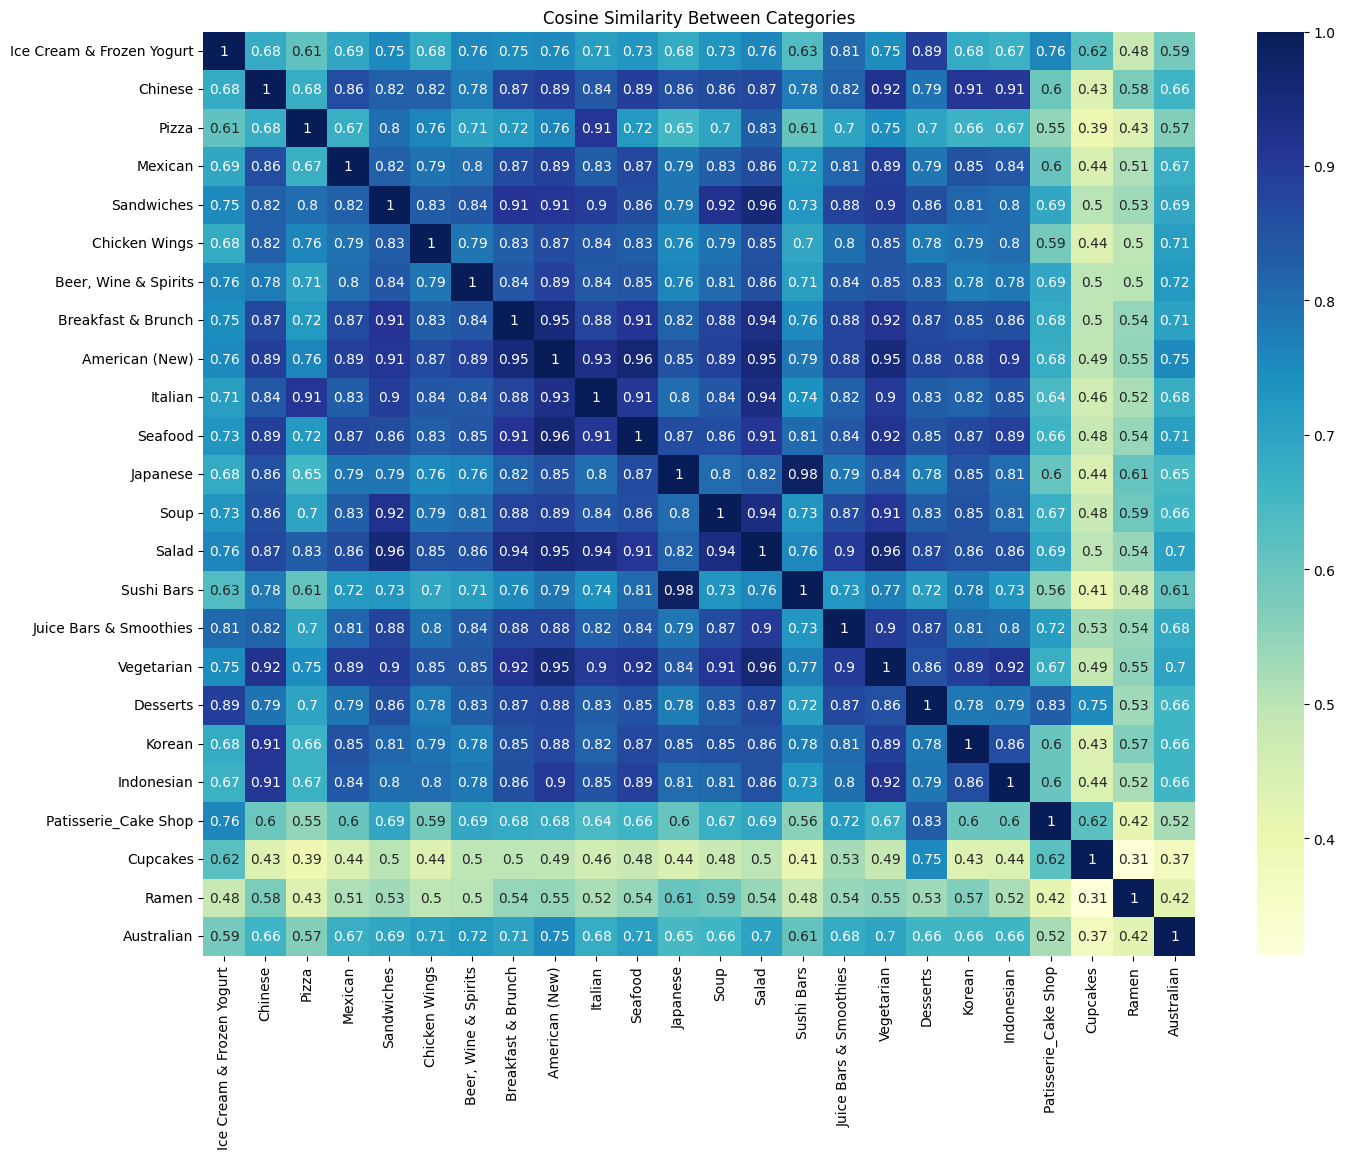

In [ ]:
# Visualize the similarity matrix with a heatmap
def visualize_similarity(similarity_matrix, category_names):
    plt.figure(figsize=(16, 12))
    sns.heatmap(similarity_matrix, xticklabels=category_names, yticklabels=category_names, cmap="YlGnBu", annot=True)
    plt.title("Cosine Similarity Between Categories")
    plt.show()

# Create the heatmap
visualize_similarity(similarity_matrix, category_names)

###**Key Insight**

**Highly Similar Categories**:

Categories like Pizza, Mexican, and Italian show high similarity, which makes sense since they may share common ingredients or food types. Sushi Bars and Japanese are also highly similar, as expected. From these samples, we know that the original cuisines from its countries have highly similarities to the country restaurants. For example, sushi and Japanese, where sushi is originally from Japan and Japanese restaurants may have sushi menus.

**Dissimilar Categories**:

Categories like Ramen and Australian or Cupcakes and Ramen show much lower similarity, indicating that the types of food and reviews are very different.

**Clustered Relationships**:

Categories that are typically similar in cuisine style (like Sushi Bars and Japanese, or Ice Cream & Frozen Yogurt and Desserts) have high cosine similarity, suggesting common features in their reviews.

## **Step 2**

Using LDA (Latent Dirichlet Allocation) to explore the categories that show high similarity based on the cosine similarity matrix. This approach will help us uncover why certain categories are similar by identifying common topics or themes in their reviews.

**Steps to Implement LDA on Similar Categories**:  

1. Identify High-Similarity Categories:  
  Based on the cosine similarity matrix you generated, identify the pairs of categories with high similarity scores. For example, if Pizza and Italian have a high similarity score, you can run LDA on their combined reviews.

2. Combine Reviews from Similar Categories:
 For each pair of high-similarity categories, combine the reviews from both categories into a single dataset.

3. Apply LDA:  
Run LDA on the combined dataset to discover the latent topics that are shared between the two categories.

4. Interpret the Topics: Analyze the topics generated by the LDA model to understand what aspects of the reviews make the categories similar (e.g., common ingredients, cooking styles, or dining experiences).

In [ ]:
# similarity_matrix and category_names
threshold = 0.9
high_similarity_pairs = []

# Identify high-similarity pairs
for i in range(len(category_names)):
    for j in range(i + 1, len(category_names)):
        if similarity_matrix[i, j] >= threshold:
            high_similarity_pairs.append((category_names[i], category_names[j]))

print("High similarity category pairs:", high_similarity_pairs)

High similarity category pairs: [('Chinese', 'Vegetarian'), ('Chinese', 'Korean'), ('Chinese', 'Indonesian'), ('Pizza', 'Italian'), ('Sandwiches', 'Breakfast & Brunch'), ('Sandwiches', 'American (New)'), ('Sandwiches', 'Soup'), ('Sandwiches', 'Salad'), ('Breakfast & Brunch', 'American (New)'), ('Breakfast & Brunch', 'Seafood'), ('Breakfast & Brunch', 'Salad'), ('Breakfast & Brunch', 'Vegetarian'), ('American (New)', 'Italian'), ('American (New)', 'Seafood'), ('American (New)', 'Salad'), ('American (New)', 'Vegetarian'), ('American (New)', 'Indonesian'), ('Italian', 'Seafood'), ('Italian', 'Salad'), ('Italian', 'Vegetarian'), ('Seafood', 'Salad'), ('Seafood', 'Vegetarian'), ('Japanese', 'Sushi Bars'), ('Soup', 'Salad'), ('Soup', 'Vegetarian'), ('Salad', 'Juice Bars & Smoothies'), ('Salad', 'Vegetarian'), ('Vegetarian', 'Indonesian')]


In [ ]:
# Load and preprocess the reviews from the preprocessed directory
def load_reviews_for_categories(categories, preprocessed_directory):
    combined_reviews = []
    for category in categories:
        file_path = os.path.join(preprocessed_directory, f"{category}.txt")
        with open(file_path, 'r', encoding='utf-8') as file:
            reviews = file.read()
            combined_reviews.append(reviews)
    return ' '.join(combined_reviews)  # Combine all reviews into a single string

# Combine reviews for each pair of categories with high similarity
def combine_reviews_for_high_similarity_pairs(high_similarity_pairs, preprocessed_directory):
    combined_reviews_pairs = []
    for pair in high_similarity_pairs:
        combined_reviews = load_reviews_for_categories(pair, preprocessed_directory)
        combined_reviews_pairs.append((pair, combined_reviews))
    return combined_reviews_pairs

# Execute the function
combined_reviews_pairs = combine_reviews_for_high_similarity_pairs(high_similarity_pairs, preprocessed_directory)

In [ ]:
nltk.download('punkt')
# Preprocess text for LDA
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Apply LDA to combined reviews for each pair
def apply_lda_to_high_similarity_pairs(combined_reviews_pairs):
    lda_results = {}
    for pair, reviews in combined_reviews_pairs:
        tokens = preprocess_text(reviews)
        dictionary = corpora.Dictionary([tokens])
        corpus = [dictionary.doc2bow(tokens)]

        # Train the LDA model
        lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

        # Save the LDA topics
        topics = lda_model.print_topics(num_words=10)
        lda_results[pair] = topics

    return lda_results

# Run LDA on the combined reviews
lda_results = apply_lda_to_high_similarity_pairs(combined_reviews_pairs)

# Display the LDA topics for each high-similarity pair
for pair, topics in lda_results.items():
    print(f"Topics for {pair}:")
    for topic in topics:
        print(topic)
    print("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topics for ('Chinese', 'Vegetarian'):
(0, '0.020*"food" + 0.014*"place" + 0.013*"good" + 0.010*"order" + 0.009*"like" + 0.008*"chicken" + 0.007*"restaur" + 0.007*"chines" + 0.007*"time" + 0.006*"great"')
(1, '0.007*"food" + 0.006*"place" + 0.005*"good" + 0.005*"like" + 0.004*"realli" + 0.004*"time" + 0.004*"chicken" + 0.004*"back" + 0.004*"order" + 0.004*"get"')
(2, '0.014*"good" + 0.013*"food" + 0.011*"place" + 0.011*"order" + 0.008*"great" + 0.008*"chicken" + 0.007*"get" + 0.007*"time" + 0.007*"like" + 0.007*"servic"')


Topics for ('Chinese', 'Korean'):
(0, '0.004*"food" + 0.003*"good" + 0.003*"place" + 0.003*"like" + 0.003*"order" + 0.002*"chines" + 0.002*"time" + 0.002*"servic" + 0.002*"realli" + 0.002*"one"')
(1, '0.018*"food" + 0.014*"good" + 0.011*"place" + 0.011*"order" + 0.010*"like" + 0.008*"get" + 0.008*"time" + 0.007*"chines" + 0.007*"one" + 0.006*"chicken"')
(2, '0.019*"food" + 0.015*"place" + 0.013*"good" + 0.010*"order" + 0.008*"like" + 0.008*"chicken" + 0.008*"restaur"

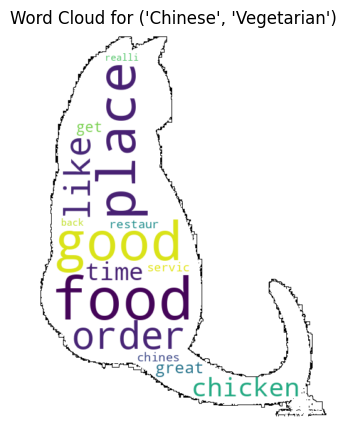

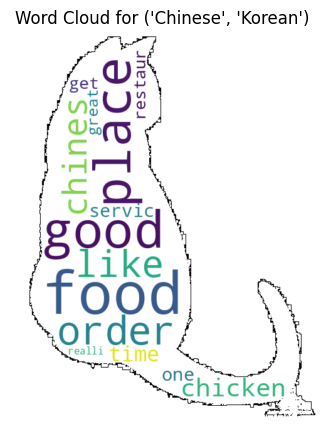

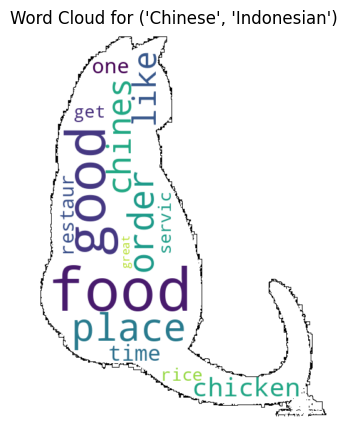

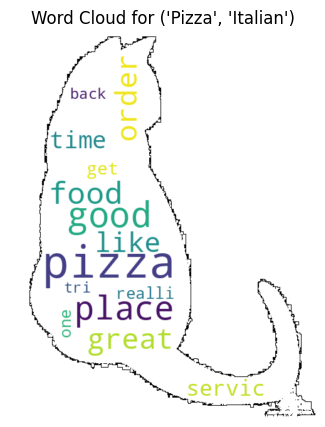

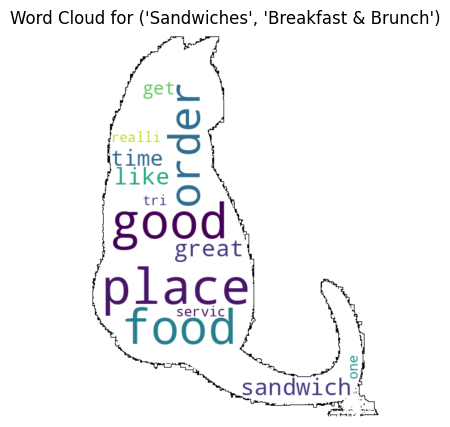

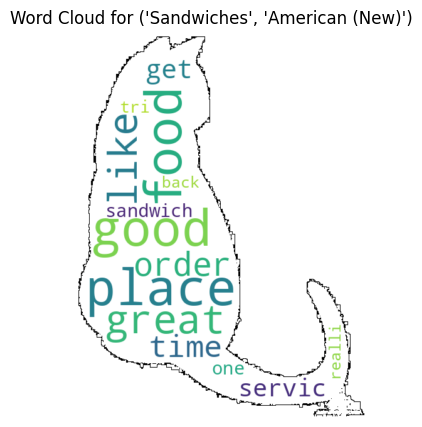

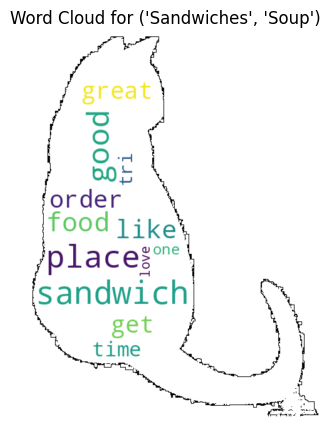

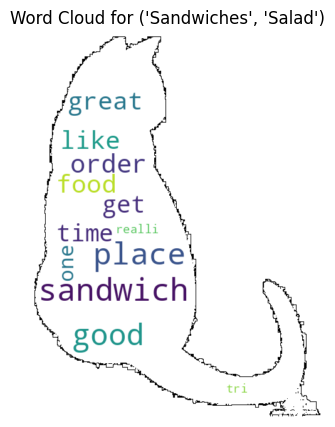

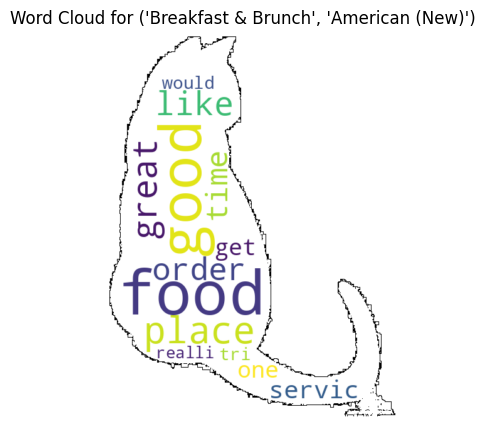

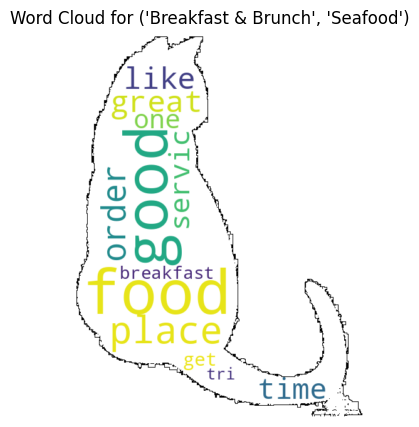

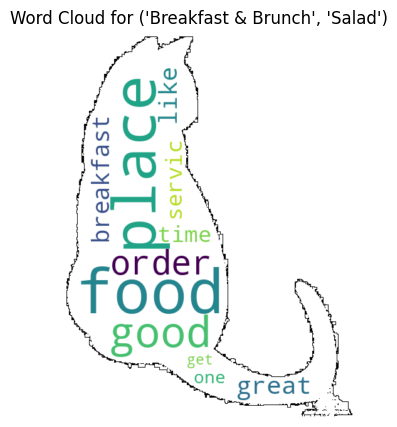

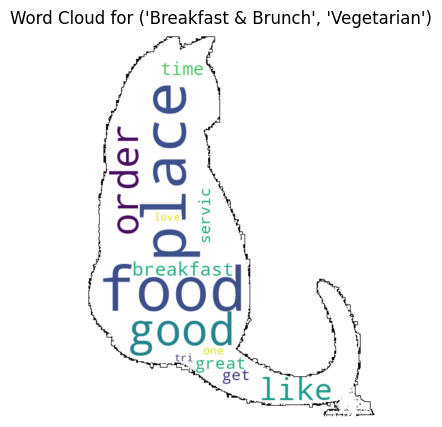

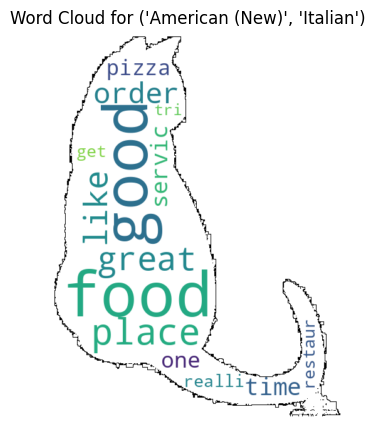

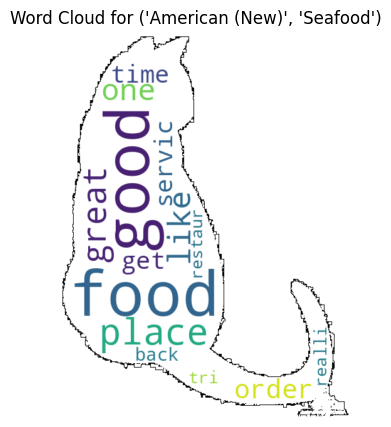

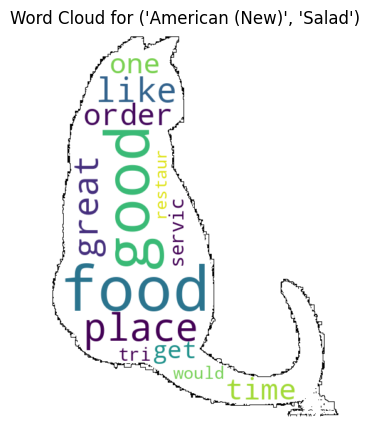

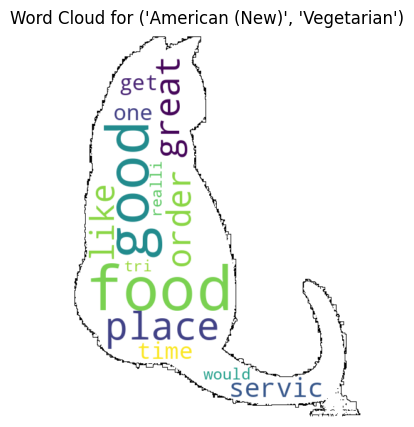

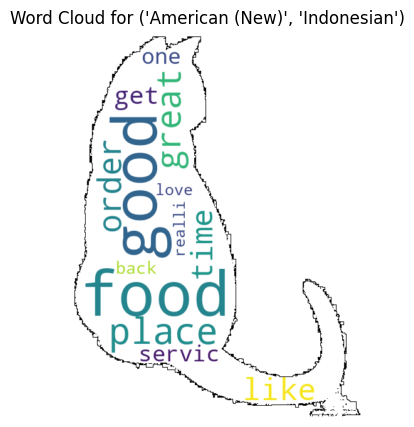

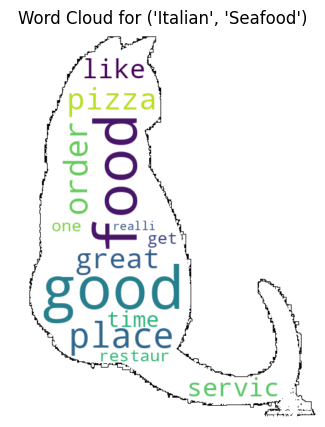

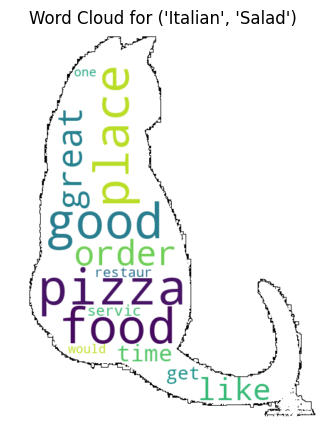

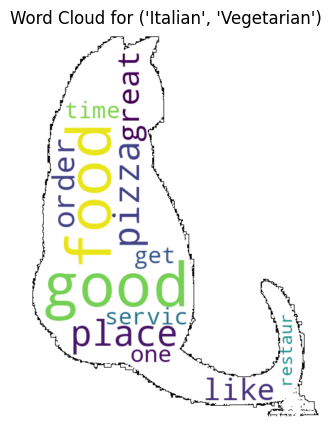

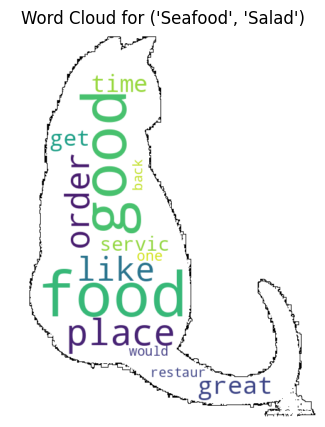

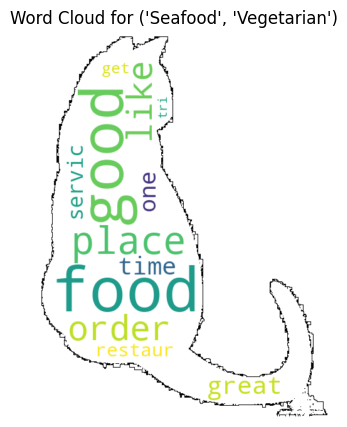

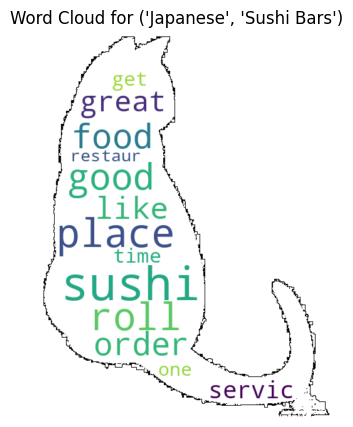

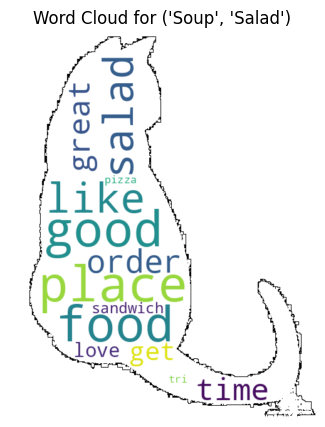

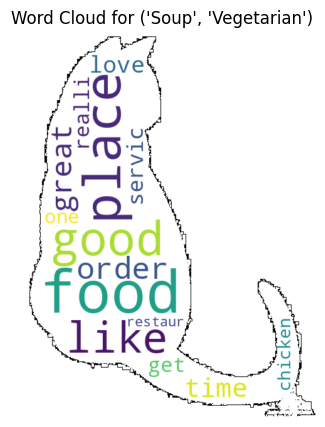

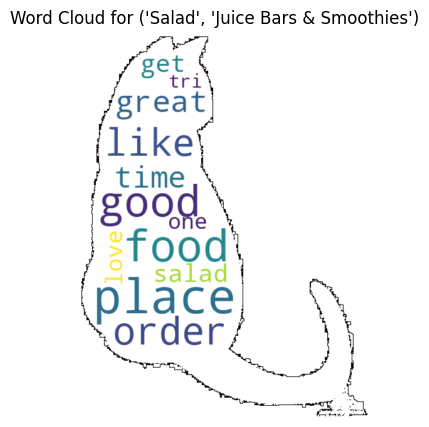

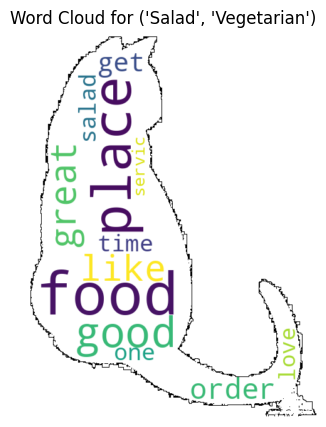

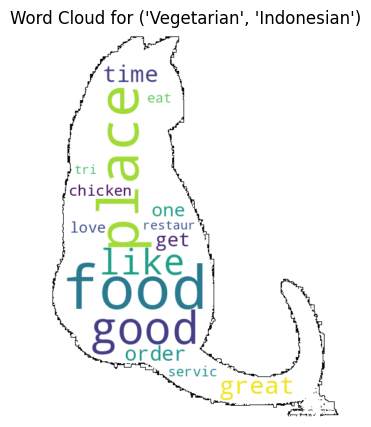

In [ ]:
# Load a custom image as the mask
mask_image_path = '/content/drive/MyDrive/Data Mining Project UIUC/cat.webp'
mask_image = np.array(Image.open(mask_image_path))

# Function to generate word clouds for each high-similarity pair
def visualize_lda_topics_by_pair(lda_results):
    for pair, topics in lda_results.items():
        # Combine words and weights from all topics for this pair
        combined_topic_words = dict()
        for topic in topics:
            for word_prob in topic[1].split(" + "):
                prob, word = word_prob.split("*")
                word = word.replace('"', '')
                combined_topic_words[word] = combined_topic_words.get(word, 0) + float(prob)

        # Generate the word cloud with a custom shape and color palette
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            mask=mask_image,  # Custom shape
            contour_color='black',  # Optional contour around the shape
            contour_width=1,
        ).generate_from_frequencies(combined_topic_words)

        # Plot the word cloud
        plt.figure(figsize=(7, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for {pair}")
        plt.show()

# Visualize word clouds for each high-similarity pair
visualize_lda_topics_by_pair(lda_results)